In [324]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [325]:
# Read the file
df = pd.read_csv('PSCompPars_2024.12.22_03.43.56.csv', comment='#')

In [326]:
df.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'sy_mnum',
       'discoverymethod', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbperlim',
       ...
       'dec', 'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag',
       'sy_vmagerr1', 'sy_vmagerr2', 'sy_gaiamag', 'sy_gaiamagerr1',
       'sy_gaiamagerr2'],
      dtype='object', length=103)

In [327]:
#There are many empty values in equilibrium temperature so mean the values and fill it 
df['pl_eqt'] = df['pl_eqt'].fillna(df['pl_eqt'].mean())

df['habitable'] = df['pl_eqt'].apply(lambda x: 1 if 273 <= x <= 373 else 0)

In [328]:
df

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,discoverymethod,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,habitable
0,11 Com b,11 Com,2,1,0,Radial Velocity,323.210000,0.060000,-0.050000,0.0,...,93.1846,1.92380,-1.92380,4.72307,0.023,-0.023,4.44038,0.003848,-0.003848,0
1,11 UMi b,11 UMi,1,1,0,Radial Velocity,516.219970,3.200000,-3.200000,0.0,...,125.3210,1.97650,-1.97650,5.01300,0.005,-0.005,4.56216,0.003903,-0.003903,0
2,14 And b,14 And,1,1,0,Radial Velocity,186.760000,0.110000,-0.120000,0.0,...,75.4392,0.71400,-0.71400,5.23133,0.023,-0.023,4.91781,0.002826,-0.002826,0
3,14 Her b,14 Her,1,2,0,Radial Velocity,1765.038900,1.677090,-1.872560,0.0,...,17.9323,0.00730,-0.00730,6.61935,0.023,-0.023,6.38300,0.000351,-0.000351,0
4,16 Cyg B b,16 Cyg B,3,1,0,Radial Velocity,798.500000,1.000000,-1.000000,0.0,...,21.1397,0.01100,-0.01110,6.21500,0.016,-0.016,6.06428,0.000603,-0.000603,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,ups And b,ups And,2,3,0,Radial Velocity,4.617033,0.000023,-0.000023,0.0,...,13.4054,0.06350,-0.06290,4.09565,0.023,-0.023,3.98687,0.008937,-0.008937,0
5807,ups And c,ups And,2,3,0,Radial Velocity,241.258000,0.064000,-0.064000,0.0,...,13.4054,0.06350,-0.06290,4.09565,0.023,-0.023,3.98687,0.008937,-0.008937,0
5808,ups And d,ups And,2,3,0,Radial Velocity,1276.460000,0.570000,-0.570000,0.0,...,13.4054,0.06350,-0.06290,4.09565,0.023,-0.023,3.98687,0.008937,-0.008937,0
5809,ups Leo b,ups Leo,1,1,0,Radial Velocity,385.200000,2.800000,-1.300000,0.0,...,52.5973,0.92720,-0.89630,4.30490,0.023,-0.023,4.03040,0.008513,-0.008513,0


In [329]:
#There are many unwanted features , will takes just the features we need. 
features = [
    'pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_eqt', 'pl_dens',
    'sy_dist', 'st_teff', 'st_rad', 'st_mass' 
]
target = 'habitable'

In [330]:
X = df[features]
y = df[target]

In [331]:
X.head()

,pl_orbper,pl_rade,pl_bmasse,pl_eqt,pl_dens,sy_dist,st_teff,st_rad,st_mass
0,323.21000,12.2,4914.89849,912.604673,14.90,93.1846,4874.0,13.76,2.09
1,516.21997,12.3,4684.81420,912.604673,13.80,125.3210,4213.0,29.79,2.78
2,186.76000,13.1,1131.15130,912.604673,2.76,75.4392,4888.0,11.55,1.78
3,1765.03890,12.6,2559.47216,912.604673,7.03,17.9323,5338.0,0.93,0.91
4,798.50000,13.5,565.73740,912.604673,1.26,21.1397,5750.0,1.13,1.08


In [332]:
X = X.fillna(X.mean()) #filling the missing values 
X

,pl_orbper,pl_rade,pl_bmasse,pl_eqt,pl_dens,sy_dist,st_teff,st_rad,st_mass
0,323.210000,12.2,4914.89849,912.604673,14.900,93.1846,4874.00,13.76,2.09
1,516.219970,12.3,4684.81420,912.604673,13.800,125.3210,4213.00,29.79,2.78
2,186.760000,13.1,1131.15130,912.604673,2.760,75.4392,4888.00,11.55,1.78
3,1765.038900,12.6,2559.47216,912.604673,7.030,17.9323,5338.00,0.93,0.91
4,798.500000,13.5,565.73740,912.604673,1.260,21.1397,5750.00,1.13,1.08
...,...,...,...,...,...,...,...,...,...
5806,4.617033,14.0,218.53100,912.604673,0.438,13.4054,6156.77,1.56,1.30
5807,241.258000,12.3,4443.24113,912.604673,13.100,13.4054,6156.77,1.56,1.30
5808,1276.460000,12.5,3257.74117,912.604673,9.170,13.4054,6156.77,1.56,1.30
5809,385.200000,14.2,162.09249,912.604673,0.311,52.5973,4836.00,11.22,1.48


In [333]:
df['pl_eqt'].head(10)

0     912.604673
1     912.604673
2     912.604673
3     912.604673
4     912.604673
5     912.604673
6     912.604673
7    1700.000000
8     912.604673
9     912.604673
Name: pl_eqt, dtype: float64

In [334]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [422]:
#training the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [404]:
from sklearn.metrics import accuracy_score, classification_report
y_prediction = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_prediction))
print("Classification Report:\n", classification_report(y_test, y_prediction))


Accuracy: 0.9564220183486238
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1684
           1       0.29      0.18      0.22        60

    accuracy                           0.96      1744
   macro avg       0.63      0.58      0.60      1744
weighted avg       0.95      0.96      0.95      1744



In [406]:
# Predict for new samples
new_samples = pd.DataFrame({
    'pl_orbper': [365, 100, 50,2],  
    'pl_rade': [1, 2.0, 1.5,3],   
    'pl_bmasse': [1.0, 5.0, 2.5,2],  
    'pl_eqt': [290, 350, 500,300],   
    'pl_dens': [5.5, 3.5, 4.0,1],   
    'sy_dist': [10, 20, 30,23],      
    'st_teff': [5700, 4500, 5000,5520],
    'st_rad': [1.0, 0.8, 0.9,0.7],   
    'st_mass': [1.0, 0.9, 0.95,1.2]   
})

predictions = model.predict(new_samples)
print("Predictions for new samples:", predictions)


Predictions for new samples: [1 0 0 1]


In [338]:
model.coef_

array([[-2.13574856e-05, -4.39903841e-02, -7.43385702e-04,
        -1.49616674e-02, -1.41936474e-04, -1.94926867e-04,
        -2.93499886e-04, -3.41257978e-01,  1.88138216e+00]])

In [408]:
model.intercept_

array([4.99875141])

In [410]:
# Get probability scores for the new samples
probability_scores = model.predict_proba(new_samples)
print("Probability Scores for new samples:\n", probability_scores)


Probability Scores for new samples:
 [[0.38419419 0.61580581]
 [0.55886891 0.44113109]
 [0.92721856 0.07278144]
 [0.31630955 0.68369045]]


In [412]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)




Confusion Matrix:
 [[1657   27]
 [  49   11]]


In [343]:
import seaborn as sns

<Axes: >

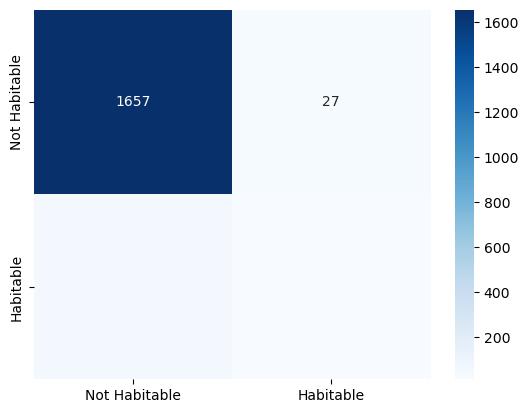

In [414]:
#confuse matrix plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Habitable', 'Habitable'], yticklabels=['Not Habitable', 'Habitable'])

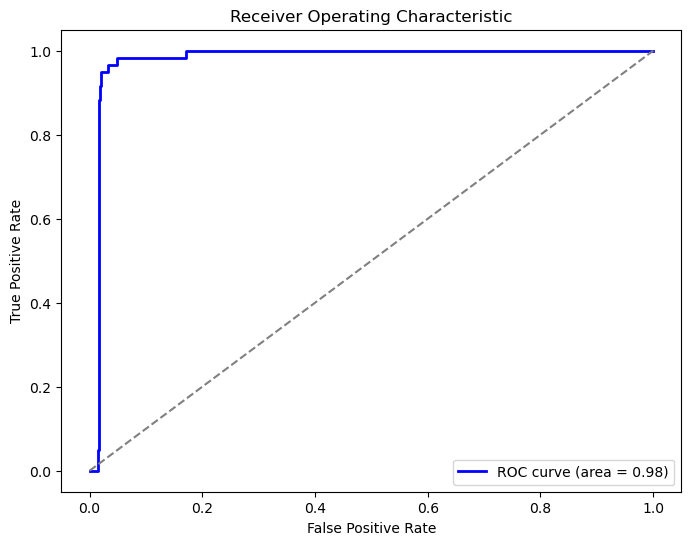

In [416]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


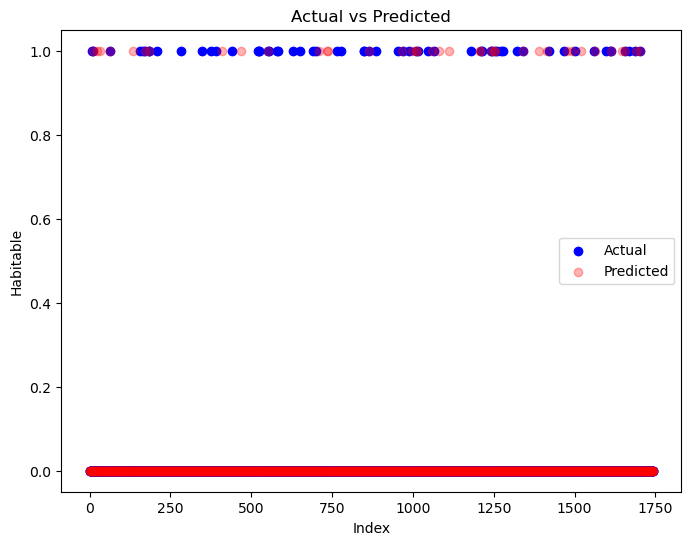

In [418]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.3)
plt.xlabel('Index')
plt.ylabel('Habitable')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


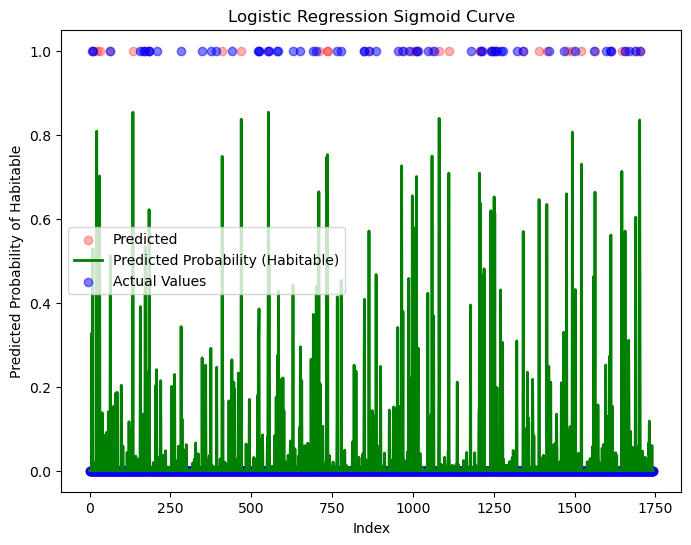

In [420]:
import matplotlib.pyplot as plt

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1] 

# Plotting 
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.3)
plt.plot(range(len(y_prob)), y_prob, color='green', label='Predicted Probability (Habitable)', lw=2)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Predicted Probability of Habitable')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()
plt.show()
